# Upper-bound Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

In [4]:
base_dir = "../trained_models/BagOfTricks/1000val/full/"
def load_data(train, test, fname, valtest=None) :
    if valtest == None :
        fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    else :
        fpath = base_dir + "{}/val/{}/best/{}/{}.txt".format(train, valtest, test, fname)

    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original", 1000)
y_original_pred = load_data(train, test, "Y_original_pred", 1000)
y_adv = load_data(train, test, "Y_adv", 1000)
y_adv_pred = load_data(train, test, "Y_adv_pred", 1000)

In [5]:
def get_robust_data(train, test, valtest=None):
    y_adv = load_data(train, test, "Y_adv", valtest)
    y_adv_pred = load_data(train, test, "Y_adv_pred", valtest)
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test, None)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 8 ... 5 1 7]


In [6]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [24]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [25]:
predictions = {}
labels = {}

for a1 in train :
    p = np.array([])
    l = np.array([])
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        p = np.concatenate((p, y_pred))
        l = np.concatenate((l, y))
    predictions[a1] = {}
    labels[a1] = {}
    predictions[a1]["all"] = p
    labels[a1]["all"] = l

for a1 in train :
    for a2 in attacks :
        y, y_pred = get_robust_data(a1, a2)
        predictions[a1][a2] = y_pred
        labels[a1][a2] = y

In [26]:
# predictions

In [27]:
# labels

In [28]:
pd.options.display.float_format = '{:,.3f}'.format

In [29]:
accs = {}
for tr in train :
    accs[tr] = {}
    for ts in test :
        accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])

    
accs = pd.DataFrame(data=accs).T
accs

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.714,0.713,0.710,0.720,0.692,0.711,0.707,0.719,0.717,0.104,0.332,0.622
autopgd,0.718,0.719,0.712,0.729,0.698,0.713,0.711,0.727,0.722,0.143,0.365,0.632
bim,0.717,0.719,0.712,0.726,0.695,0.714,0.714,0.724,0.722,0.093,0.292,0.621
cw,0.704,0.706,0.703,0.724,0.680,0.702,0.708,0.720,0.715,0.108,0.368,0.622
fgsm,0.702,0.703,0.702,0.710,0.699,0.702,0.706,0.710,0.706,0.105,0.282,0.612
pgd,0.702,0.703,0.700,0.712,0.682,0.699,0.698,0.711,0.707,0.122,0.338,0.616
deepfool,0.716,0.716,0.710,0.728,0.702,0.712,0.721,0.728,0.718,0.091,0.347,0.626
newtonfool,0.699,0.703,0.702,0.718,0.685,0.699,0.702,0.719,0.717,0.153,0.326,0.620
squareattack,0.639,0.640,0.640,0.706,0.620,0.635,0.664,0.700,0.751,0.106,0.309,0.583
pixelattack,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.644,0.100,0.149


In [30]:
sorted_acc = accs.sort_values(by="all", ascending=False)
idx = list(sorted_acc.index)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,autopgd,deepfool,autoattack,cw,bim,newtonfool,pgd,fgsm,squareattack,spatialtransformation,pixelattack,all
autopgd,0.719,0.711,0.718,0.729,0.712,0.727,0.713,0.698,0.722,0.365,0.143,0.632
deepfool,0.716,0.721,0.716,0.728,0.710,0.728,0.712,0.702,0.718,0.347,0.091,0.626
autoattack,0.713,0.707,0.714,0.720,0.710,0.719,0.711,0.692,0.717,0.332,0.104,0.622
cw,0.706,0.708,0.704,0.724,0.703,0.720,0.702,0.680,0.715,0.368,0.108,0.622
bim,0.719,0.714,0.717,0.726,0.712,0.724,0.714,0.695,0.722,0.292,0.093,0.621
newtonfool,0.703,0.702,0.699,0.718,0.702,0.719,0.699,0.685,0.717,0.326,0.153,0.620
pgd,0.703,0.698,0.702,0.712,0.700,0.711,0.699,0.682,0.707,0.338,0.122,0.616
fgsm,0.703,0.706,0.702,0.710,0.702,0.710,0.702,0.699,0.706,0.282,0.105,0.612
squareattack,0.640,0.664,0.639,0.706,0.640,0.700,0.635,0.620,0.751,0.309,0.106,0.583
spatialtransformation,0.444,0.442,0.441,0.480,0.436,0.480,0.441,0.446,0.499,0.738,0.098,0.450


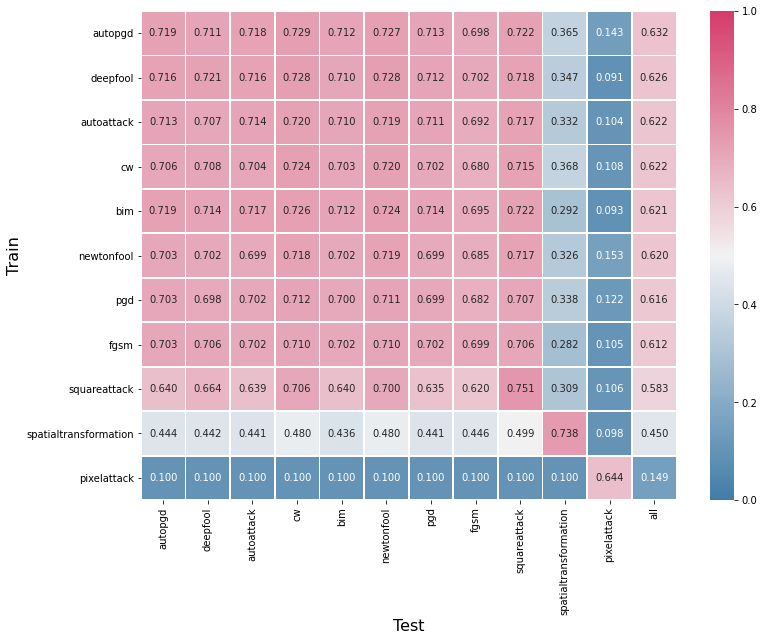

In [14]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Test', ylabel='Train', fontsize=18)
    plt.xlabel('Test', fontsize=16)
    plt.ylabel('Train', fontsize=16)
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)

path = "plot/bot-accuracy.png"

plot_heatmap(sorted_acc, cmap, path, 0, 1)

In [15]:
# print(sorted_acc.to_latex(bold_rows=True))

## Time Execution Measurement

In [16]:
import datetime

def get_adv_train_time_execution(train) :
#     fpath = "trained_models/{}/output.log".format(train)
    fpath = base_dir + "resnet18_{}_piecewise_eps8_bs128_maxlr0.1_ls0.3_BNeval/output.log".format(train)
#     if train == "all" or train == "combine_autopgd_pixelattack_spatialtransformation_squareattack" or train == "combine_newtonfool_pixelattack_spatialtransformation_squareattack":
#             fpath = "trained_models/resnet18_{}_piecewise_eps8_bs128_maxlr0.1_ls0.3_BNeval/output.log".format(train)

    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")
    
# _train = "autoattack"
# _train = "all"
# get_adv_train_time_execution(_train) + get_adv_train_time_execution("fgsm") 

In [16]:
durations = []
for tr in train :
    if tr[:7] == "combine" :
        duration = None
        for i in range(len(attacks)) :
            a = attacks[i]
            if i == 0 :
                duration = get_adv_train_time_execution(a)
            else :
                duration += get_adv_train_time_execution(a)
        duration+= get_adv_train_time_execution(tr)
        durations.append(duration)
    else :
        durations.append(get_adv_train_time_execution(tr))

accs["duration"] = durations

In [17]:
accs["all"]
# accs

autoattack               0.637491
autopgd                  0.638136
bim                      0.631791
cw                       0.635700
fgsm                     0.623427
pgd                      0.636827
deepfool                 0.628900
newtonfool               0.639245
squareattack             0.599618
pixelattack              0.154864
spatialtransformation    0.440300
Name: all, dtype: float64

In [18]:
sorted_acc = accs.sort_values(by="all", ascending=False)
sorted_acc

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all,duration
newtonfool,0.7248,0.7257,0.7227,0.7384,0.7061,0.7201,0.7277,0.7388,0.7354,0.1332,0.3588,0.639245,0 days 01:06:00
autopgd,0.7254,0.7262,0.7227,0.7351,0.6999,0.7239,0.7215,0.7343,0.7322,0.1337,0.3646,0.638136,0 days 02:04:21
autoattack,0.7300,0.7310,0.7296,0.7422,0.7109,0.7279,0.7278,0.7432,0.7329,0.1097,0.3272,0.637491,0 days 02:05:26
pgd,0.7290,0.7263,0.7249,0.7377,0.7095,0.7246,0.7288,0.7369,0.7315,0.1408,0.3151,0.636827,0 days 03:03:10
cw,0.7253,0.7209,0.7202,0.7406,0.7021,0.7203,0.7290,0.7392,0.7353,0.1166,0.3432,0.635700,0 days 02:04:57
bim,0.7212,0.7221,0.7222,0.7263,0.7045,0.7207,0.7148,0.7259,0.7229,0.1265,0.3426,0.631791,0 days 02:03:13
deepfool,0.7138,0.7125,0.7115,0.7327,0.6995,0.7130,0.7274,0.7317,0.7233,0.0974,0.3551,0.628900,0 days 02:03:55
fgsm,0.7121,0.7108,0.7106,0.7169,0.7033,0.7101,0.7058,0.7172,0.7081,0.1160,0.3468,0.623427,0 days 02:02:49
squareattack,0.6564,0.6556,0.6553,0.7085,0.6288,0.6519,0.6617,0.7088,0.7629,0.1508,0.3551,0.599618,0 days 02:44:20
spatialtransformation,0.4344,0.4315,0.4280,0.4630,0.4315,0.4241,0.4435,0.4657,0.4779,0.0988,0.7449,0.440300,0 days 02:59:49


In [19]:
selected_sorted_acc = sorted_acc[:][["all", "duration"]]
selected_sorted_acc.rename(columns={"all":"test_on_all_adv"})

,test_on_all_adv,duration
newtonfool,0.639245,0 days 01:06:00
autopgd,0.638136,0 days 02:04:21
autoattack,0.637491,0 days 02:05:26
pgd,0.636827,0 days 03:03:10
cw,0.635700,0 days 02:04:57
bim,0.631791,0 days 02:03:13
deepfool,0.628900,0 days 02:03:55
fgsm,0.623427,0 days 02:02:49
squareattack,0.599618,0 days 02:44:20
spatialtransformation,0.440300,0 days 02:59:49


In [60]:
# 3 classes
_clusters = {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}

# 4 classes
# _clusters = {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool'], 3: ['squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}

In [61]:
clusters = []
for member in _clusters.values() :
    cluster = {}
    cluster["member"] = member
    centroid = member[0]
    acc = sorted_acc["all"][centroid]
    for x in member :
        if sorted_acc["all"][x] > acc :
            centroid = x
            acc = sorted_acc["all"][x]
    cluster["centroid"] = centroid
    clusters.append(cluster)

print(clusters)

[{'member': ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 'centroid': 'newtonfool'}, {'member': ['pixelattack'], 'centroid': 'pixelattack'}, {'member': ['spatialtransformation'], 'centroid': 'spatialtransformation'}]


In [50]:
upper_bound = 0
n = 0
for c in clusters :
    centroid = c["centroid"]
    for m in c["member"] :
        upper_bound += sorted_acc[m][centroid]
        n += 1
print("Upper bound: ", upper_bound/n)

Upper bound:  0.7285636363636364


In [65]:
def get_execution_time(fpath) :
    
    file = open(fpath)
    lines = file.readlines()
    file.close()
    
    start_time = None
    end_time = None
    
    datefmt='%Y/%m/%d %H:%M:%S'
    
    
    for l in lines :
        token = l.split("-")
        date_str = token[0][1:-2]
        date_time = datetime.datetime.strptime(date_str, datefmt)
        if token[1][1:11] == "Namespace(" :
            start_time = date_time
        else :
            end_time = date_time
    
    if end_time > start_time :
        return end_time-start_time
    raise ValueError("Duration not found")

In [71]:
duration = None
for i in range(len(attacks)) :
    a = attacks[i]
    fpath = "trained_models/backup/resnet18_{}_piecewise_eps8_bs128_maxlr0.1_ls0.3_BNeval/output.log".format(a)
    if i == 0 :
        duration = get_execution_time(fpath)
    else :
        duration += get_execution_time(fpath)

fpath = "noise_predictors/resnet18_3_pixelattack_spatialtransformation_autopgd_piecewise_eps8_bs128_maxlr0.05_wd0.0001_ls0.3_BNeval/output.log"
duration += get_execution_time(fpath)

fpath = "ensemble_models/cifar_model/eval/all/output.log"
duration += get_execution_time(fpath)

days_and_time = duration
days = days_and_time.days
seconds = days_and_time.seconds

hours = seconds//3600
minutes = (seconds//60)%60
print("days:", days, "\nhours:", hours, "\nminutes:", minutes)

days: 1 
hours: 2 
minutes: 47
